<a href="https://colab.research.google.com/github/zahranicp/hands-on-ML2/blob/main/chapter01/Chapter_1_The_Machine_Learning_Landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

print("Python version:", sys.version)
print("Scikit-learn version:", sklearn.__version__)
assert sys.version_info >= (3, 6)
assert sklearn.__version__ >= "0.20"


Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Scikit-learn version: 1.6.1


In [14]:
base_url = "https://raw.githubusercontent.com/zahranicp/hands-on-ML2/b5057b1d1bd4a4d2b8ab53254c975847790c3cef/dataset/lifesat/"
files = {
    "oecd_bli_2015.csv": ",",
    "gdp_per_capita.csv": "\t"
}
for filename, sep in files.items():
    df = pd.read_csv(base_url + filename, delimiter=sep, encoding="latin1", thousands=",", na_values="n/a")
    globals()[filename.split(".")[0]] = df


In [15]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(min(36, len(full_country_stats)))) - set(remove_indices))
    return full_country_stats.iloc[keep_indices], full_country_stats.iloc[remove_indices], full_country_stats

sample_data, missing_data, full_data = prepare_country_stats(oecd_bli_2015, gdp_per_capita)
X = np.c_[sample_data["GDP per capita"]]
y = np.c_[sample_data["Life satisfaction"]]


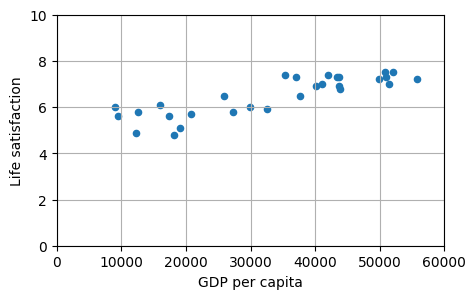

Prediction (Linear Regression): 5.962423376619663


In [16]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5, 3))
plt.axis([0, 60000, 0, 10])
plt.grid(True)
plt.show()

lin_reg = LinearRegression()
lin_reg.fit(X, y)
X_new = [[22587]]
pred_lin = lin_reg.predict(X_new)
print("Prediction (Linear Regression):", pred_lin[0][0])


In [17]:
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X, y)
pred_knn = knn_reg.predict(X_new)
print("Prediction (KNN):", pred_knn[0][0])


Prediction (KNN): 5.766666666666666


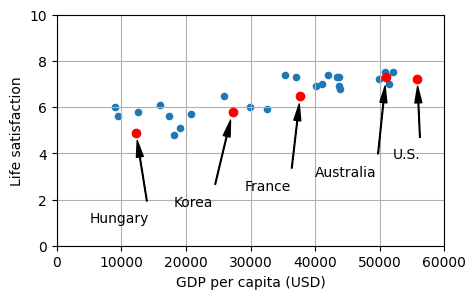

In [18]:
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5, 3))
plt.axis([0, 60000, 0, 10])

for country, pos_text in position_text.items():
    x = sample_data.loc[country, "GDP per capita"]
    y_ = sample_data.loc[country, "Life satisfaction"]
    name = "U.S." if country == "United States" else country
    plt.annotate(name, xy=(x, y_), xytext=pos_text,
                 arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(x, y_, "ro")

plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.grid(True)
plt.show()


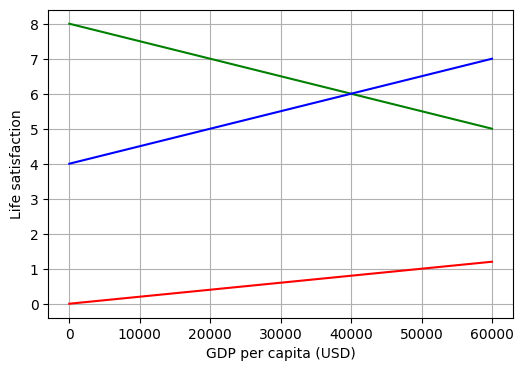

In [19]:
X_vals = np.linspace(0, 60000, 1000)
plt.figure(figsize=(6, 4))
plt.plot(X_vals, 2*X_vals/100000, "r")
plt.plot(X_vals, 8 - 5*X_vals/100000, "g")
plt.plot(X_vals, 4 + 5*X_vals/100000, "b")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.grid(True)
plt.show()

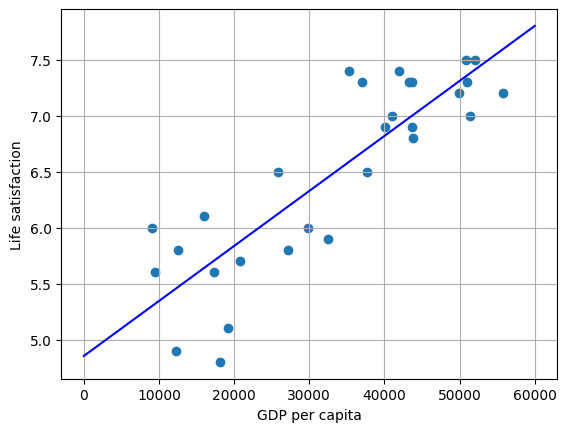

In [20]:
t0, t1 = lin_reg.intercept_[0], lin_reg.coef_[0][0]
plt.scatter(X, y)
plt.plot(X_vals, t0 + t1 * X_vals, "b")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.grid(True)
plt.show()

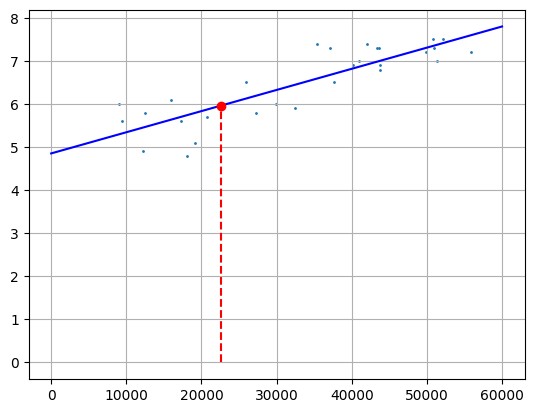

In [21]:
cyprus_gdp = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
cyprus_pred = lin_reg.predict([[cyprus_gdp]])[0][0]
plt.scatter(X, y, s=1)
plt.plot(X_vals, t0 + t1 * X_vals, "b")
plt.plot([cyprus_gdp, cyprus_gdp], [0, cyprus_pred], "r--")
plt.plot(cyprus_gdp, cyprus_pred, "ro")
plt.grid(True)
plt.show()

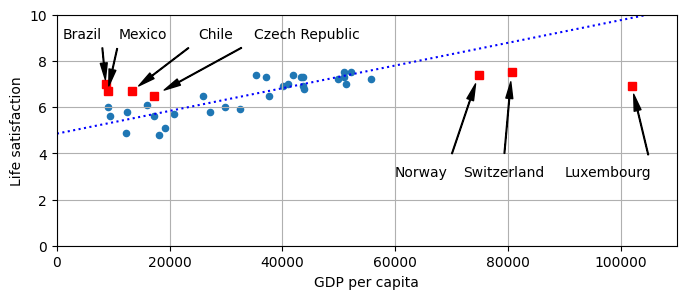

In [22]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8, 3))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    x = missing_data.loc[country, "GDP per capita"]
    y_ = missing_data.loc[country, "Life satisfaction"]
    plt.annotate(country, xy=(x, y_), xytext=pos_text,
                 arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(x, y_, "rs")

X_vals = np.linspace(0, 110000, 1000)
plt.plot(X_vals, t0 + t1 * X_vals, "b:")
plt.grid(True)
plt.show()


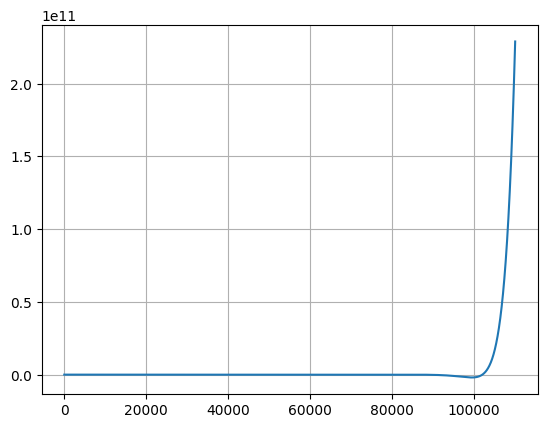

In [23]:
Xfull = np.c_[full_data["GDP per capita"]]
yfull = np.c_[full_data["Life satisfaction"]]
poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=30, include_bias=False)),
    ("scaler", StandardScaler()),
    ("lin", LinearRegression())
])
poly_model.fit(Xfull, yfull)
curve = poly_model.predict(X_vals.reshape(-1, 1))
plt.plot(X_vals, curve)
plt.grid(True)
plt.show()

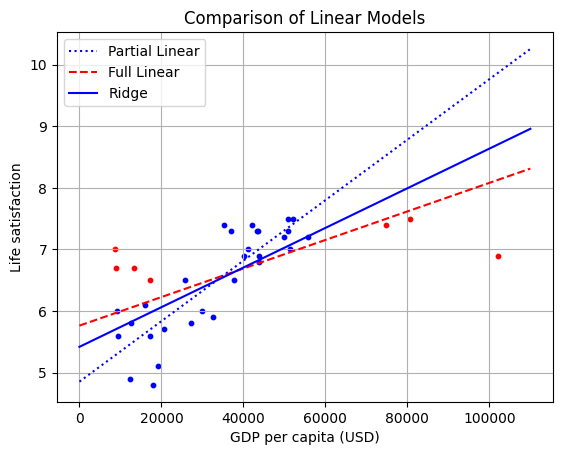

In [24]:
lin_reg_full = LinearRegression()
lin_reg_full.fit(Xfull, yfull)
t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]

ridge = Ridge(alpha=10**9.5)
ridge.fit(X, y)
t0ridge = ridge.intercept_       # scalar
t1ridge = ridge.coef_[0]         # array 1D

plt.plot(X_vals, t0 + t1 * X_vals, "b:", label="Partial Linear")
plt.plot(X_vals, t0full + t1full * X_vals, "r--", label="Full Linear")
plt.plot(X_vals, t0ridge + t1ridge * X_vals, "b", label="Ridge")
plt.scatter(X, y, color="blue", s=10)
plt.scatter(missing_data["GDP per capita"], missing_data["Life satisfaction"], color="red", s=10)
plt.legend()
plt.grid(True)
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.title("Comparison of Linear Models")
plt.show()



# 📊 Analisis Eksperimen GDP vs Life Satisfaction

*(Studi Berdasarkan Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow, 2nd Edition)*

## 1. Persiapan dan Pembersihan Dataset

Eksperimen ini menggunakan dua dataset:

* **OECD Better Life Index (oecd_bli_2015.csv)**: berisi indikator kesejahteraan, termasuk *life satisfaction*.
* **GDP per capita (gdp_per_capita.csv)**: berisi data Produk Domestik Bruto per kapita dari berbagai negara.

Langkah yang dilakukan:

* Memilih indikator dengan ketimpangan `"TOT"` agar setiap negara hanya memiliki satu nilai representatif.
* Menggabungkan dataset GDP dan indikator kebahagiaan berdasarkan nama negara sebagai indeks.
* Mengurutkan data berdasarkan GDP per kapita.
* Menghapus beberapa *outlier* (misalnya Brazil, Mexico, Chile, dll) yang menyimpang jauh dari tren utama.

## 2. Eksplorasi Visual Awal

Scatter plot digunakan untuk menggambarkan hubungan antara:

* **GDP per capita** (sumbu x)
* **Life satisfaction** (sumbu y)

Hasil visualisasi awal menunjukkan adanya korelasi positif: negara dengan GDP lebih tinggi cenderung memiliki tingkat kepuasan hidup yang lebih tinggi, meskipun terdapat beberapa pengecualian (*outlier*).

## 3. Regresi Linier (Model Dasar)

### Konsep

Model regresi linier mengikuti persamaan:

$
\hat{y} = \theta_0 + \theta_1 x
$

di mana:

* `θ₀` = intercept (perkiraan kepuasan hidup saat GDP = 0)
* `θ₁` = slope (tingkat perubahan kepuasan hidup untuk setiap kenaikan GDP per kapita).

### Hasil

Model ini digunakan untuk memprediksi *life satisfaction* suatu negara. Misalnya, prediksi untuk Cyprus dengan GDP $22,587 menghasilkan estimasi kepuasan hidup sekitar **5.96**.

## 4. Regresi K-Nearest Neighbors (KNN)

### Konsep

KNN Regressor dengan `k=3` menghitung prediksi berdasarkan rata-rata nilai *life satisfaction* dari tiga negara dengan GDP terdekat.

**Kelebihan:**

* Non-parametrik, sehingga tidak bergantung pada asumsi linier.
* Lebih adaptif pada pola lokal.

**Hasil:**
Prediksi untuk Cyprus lebih rendah dibanding regresi linier karena dipengaruhi langsung oleh negara-negara tetangga terdekat dalam hal GDP.

## 5. Scatter Plot dengan Anotasi Negara

Untuk memperkaya analisis, negara-negara seperti Hungary, Korea, dan France dianotasi pada scatter plot. Hal ini membantu mengidentifikasi negara yang tidak sesuai dengan tren umum.

## 6. Visualisasi Beberapa Garis Regresi

Beberapa garis regresi dengan parameter berbeda (`θ₀`, `θ₁`) digambarkan untuk menekankan pentingnya estimasi parameter yang tepat. Garis dengan *fit* terbaik dipilih menggunakan algoritma regresi linier.

## 7. Model Linear Regression dengan Fitting Optimal

Model `LinearRegression` dilatih dengan data yang sudah dibersihkan. Hasil fitting menampilkan:

* Nilai `θ₀` dan `θ₁` sebagai parameter optimal.
* Garis regresi yang merepresentasikan *best fit line*.

Prediksi untuk Cyprus divisualisasikan dengan garis putus-putus merah (proyeksi ke sumbu x dan y) serta titik merah (estimasi life satisfaction).

## 8. Analisis Data yang Dibuang (Outlier)

Beberapa negara (Brazil, Chile, Mexico, Norway, dll) ditampilkan dengan simbol merah pada plot untuk menunjukkan penyimpangan dari tren umum. Hal ini memperjelas alasan pengecualian mereka dalam fitting awal.

## 9. Regresi Polinomial (Overfitting)

### Konsep

Regresi polinomial menambahkan derajat bebas dengan persamaan:

$
\hat{y} = \theta_0 + \theta_1 x + \theta_2 x^2 + \dots + \theta_d x^d
$

Dengan derajat tinggi (`degree=30`), model sangat fleksibel sehingga *fit* terhadap hampir semua titik data, namun menghasilkan **overfitting** yang buruk untuk generalisasi.

## 10. Ridge Regression (Regularisasi L2)

### Konsep

Ridge Regression meminimalkan fungsi kerugian dengan penalti terhadap parameter besar:

$
\text{Loss} = \text{MSE} + \alpha \sum \theta_i^2
$

Dengan nilai α besar (misalnya `10^9.5`), parameter ditekan mendekati nol, menghasilkan model yang lebih sederhana dan stabil.

## 11. Perbandingan Model

* **Partial Linear Regression**: dilatih dengan sebagian kecil data → cenderung *overfit*.
* **Full Linear Regression**: dilatih dengan semua data → lebih stabil dan representatif.
* **Ridge Regression**: menjaga kestabilan meskipun hanya dilatih dari subset data.

Visualisasi menunjukkan:

* Garis biru putus-putus = overfit pada subset data.
* Garis merah = hasil regresi penuh, lebih representatif.
* Garis biru solid = hasil Ridge Regression, tetap stabil walau dengan subset data.

---

## 🔚 Kesimpulan

* **GDP per kapita** punya korelasi positif dengan tingkat *life satisfaction*, tetapi hubungan ini tidak sepenuhnya linier dan dipengaruhi faktor lain.
* **Linear Regression** efektif sebagai model dasar, tetapi sensitif terhadap *outlier*.
* **KNN Regression** lebih adaptif terhadap pola lokal, namun tidak selalu stabil.
* **Polynomial Regression** dapat menjelaskan variasi non-linier, tetapi rentan *overfitting* pada derajat tinggi.
* **Ridge Regression** memberikan kompromi terbaik dengan regularisasi, sehingga mengurangi risiko *overfitting* dan meningkatkan generalisasi.

Hasil eksperimen ini menunjukkan pentingnya memilih model yang sesuai dengan karakteristik data. Sebagaimana dibahas dalam *Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow (2nd Edition)*, regresi linier sederhana bisa menjadi langkah awal yang kuat, tetapi penerapan teknik regulasi dan eksplorasi model non-linier sangat penting untuk mendapatkan prediksi yang lebih andal.

